## Preprocessing data (Normalization and Standardization)

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In machine learning, normalization is a data preprocessing technique used to scale and transform the feature values in a dataset. The goal of normalization is to bring all features to a similar scale, which can be important for certain machine learning algorithms to work effectively. It helps in preventing some features from dominating the learning process simply because they have larger magnitudes than others.

Normalization is particularly useful when features have different units, ranges, or distributions. It ensures that all features contribute equally to the learning process, making the model's training more stable and efficient. Normalization does not change the shape of the data distribution but instead shifts and rescales the data to fit within a specific range or distribution.

Two commonly used methods for normalization are:

1. Min-Max Normalization (also known as Rescaling):
This method scales the data to a fixed range, typically between 0 and 1.

    It is performed using the following formula for each feature:

    X_normalized = (X - X_min) / (X_max - X_min)

  where X is the original feature value, X_min is the minimum value of that feature in the dataset, and X_max is the maximum value of that feature in the dataset.


2.  Z-score Normalization (also known as Standardization):
This method transforms the data to have a mean of 0 and a standard deviation of 1.


    It is performed using the following formula for each feature:

    X_standardized = (X - mean) / standard_deviation

  where X is the original feature value, mean is the mean of that feature in the dataset, and standard_deviation is the standard deviation of that feature in the dataset.


Which method to use depends on the characteristics of the data and the requirements of the specific machine learning algorithm being used. For instance, neural networks often benefit from Z-score normalization, while Min-Max normalization may be more suitable for algorithms like support vector machines (SVMs) or k-nearest neighbors (KNN).

Additionally, some algorithms, like decision trees and random forests, are not affected by feature scaling, and in such cases, normalization might not be necessary.

In [2]:
# let's import our dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Let's one hot encdoe our dataset
insurance_one_hot_encode = pd.get_dummies(insurance)
insurance_one_hot_encode.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Let's create features and labels
X = insurance_one_hot_encode.drop("charges", axis= 1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y = insurance_one_hot_encode["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

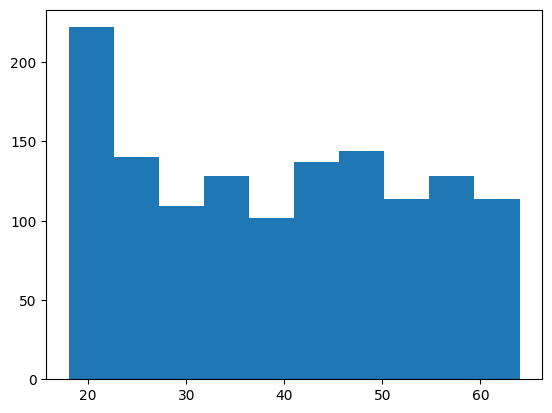

In [7]:
plt.hist(X["age"])

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

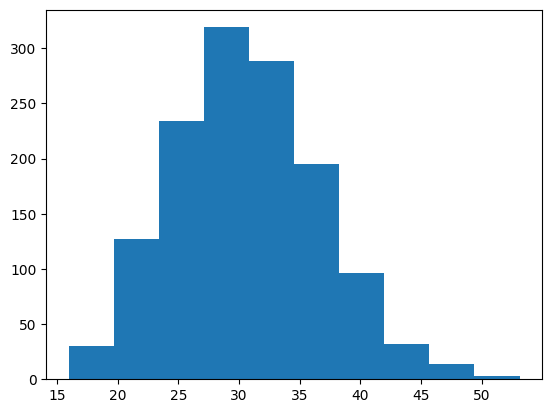

In [9]:
plt.hist(X["bmi"])

In [10]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better.